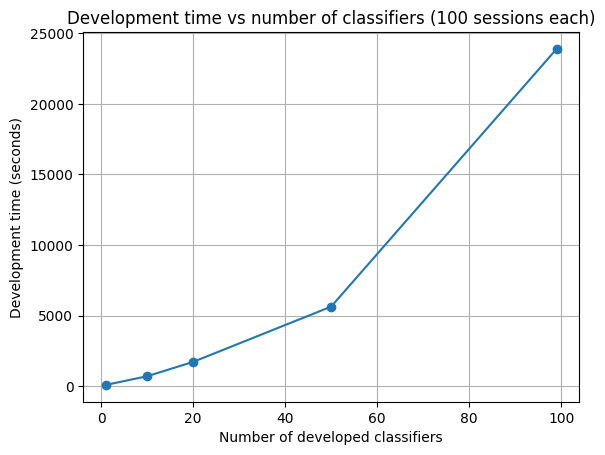

In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

log_dir = "logs"
classifiers = []
durations = []

for filename in sorted(os.listdir(log_dir)):
    if filename.startswith("development_log_") and filename.endswith(".csv"):
        filepath = os.path.join(log_dir, filename)

        df = pd.read_csv(filepath)

        x = len(df)-2

        # tempo totale di sviluppo
        duration = df.iloc[-1]["timestamp"] - df.iloc[0]["timestamp"]

        classifiers.append(x)
        durations.append(duration)

# ordina per numero di classificatori (sicurezza)
classifiers, durations = zip(*sorted(zip(classifiers, durations)))

# plot
plt.figure()
plt.plot(classifiers, durations, marker="o")
plt.xlabel("Number of developed classifiers")
plt.ylabel("Development time (seconds)")
plt.title("Development time vs number of classifiers (100 sessions each)")
plt.grid(True)
plt.show()


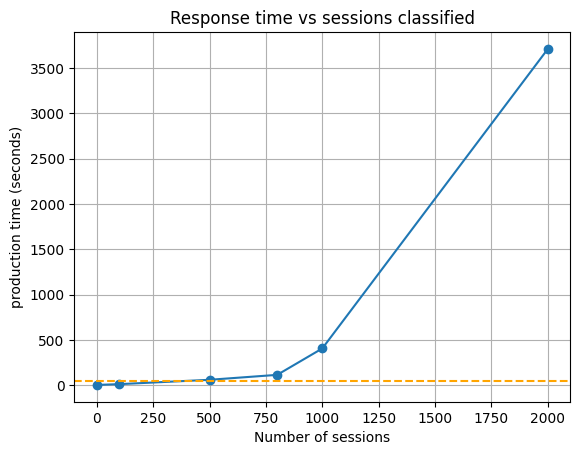

In [77]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

log_dir = "logs"
pattern = re.compile(r"(\d+)\s+sessions", re.IGNORECASE)
classifiers = []
durations = []

for filename in sorted(os.listdir(log_dir)):
    if filename.startswith("production_log_") and filename.endswith(".csv"):
        filepath = os.path.join(log_dir, filename)

        df = pd.read_csv(filepath)

        first_msg = str(df.iloc[0, 1]) if df.shape[1] > 1 else ""
        m = pattern.search(first_msg)
        x = int(m.group(1)) if m else None
        # tempo totale di sviluppo
        duration = df.iloc[-1]["timestamp"] - df.iloc[0]["timestamp"]

        classifiers.append(x)
        durations.append(duration)

# ordina per numero di classificatori (sicurezza)
classifiers, durations = zip(*sorted(zip(classifiers, durations)))

# plot
plt.figure()
plt.plot(classifiers, durations, marker="o")
plt.axhline(y=50, linestyle="--", color="orange", label="50 seconds threshold")
plt.xlabel("Number of sessions")
plt.ylabel("production time (seconds)")
plt.title("Response time vs sessions classified")
plt.grid(True)
plt.show()
